## Feature Engineering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Kavinilavan\Anaconda s\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
client=pd.read_csv("client.csv")
client.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed


In [3]:
client.dtypes

id                                 object
price_date                         object
price_off_peak_var                float64
price_peak_var                    float64
price_mid_peak_var                float64
price_off_peak_fix                float64
price_peak_fix                    float64
price_mid_peak_fix                float64
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                           

## one hot encoding

In [4]:
client['has_gas'].unique()

array(['f', 't'], dtype=object)

In [5]:
#For the column has_gas,replace t for 1 and f for 0
client['has_gas']=client['has_gas'].replace(['t','f'],[1,0])

In [6]:
client['has_gas'].unique()

array([0, 1], dtype=int64)

In [7]:
client['churn'].unique()

array(['Stayed', 'Churned'], dtype=object)

In [8]:
#For the column churn,replace churn for 0 and stayed for 1
client['churn']=client['churn'].replace(['Stayed','Churned'],[1,0])

In [9]:
## hot encoding for orign_up
origin_dummies=pd.get_dummies(client[['origin_up']])
merged = pd.concat([client,origin_dummies],axis='columns')
merged

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,num_years_antig,origin_up,pow_max,churn,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,1,0,0,0,1,0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,1,0,0,0,1,0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,1,0,0,0,1,0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,1,0,0,0,1,0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,1,0,0,0,0,1,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,1,0,0,0,0,1,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,1,0,0,0,0,1,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,1,0,0,0,0,1,0


In [10]:
channel_sales_dummies=pd.get_dummies(merged[['channel_sales']])
merged_one = pd.concat([merged,channel_sales_dummies],axis='columns')
merged_one

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0,0,0,0,0,0,1,0,0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0,0,0,0,0,0,1,0,0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0,0,0,0,0,0,1,0,0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0,0,0,0,0,0,1,0,0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,1,0,0,0,0,0,1,0,0,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,1,0,0,0,0,0,1,0,0,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,1,0,0,0,0,0,1,0,0,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,26272,...,1,0,0,0,0,0,1,0,0,0


In [11]:
# drop original column
final = merged_one.drop(["channel_sales","origin_up"], axis='columns')
final

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,...,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,0,0,0,0,0,0,1,0,0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,0,0,0,0,0,0,1,0,0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,0,0,0,0,0,0,1,0,0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,0,0,0,0,0,0,1,0,0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,1,0,0,0,0,0,1,0,0,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,1,0,0,0,0,0,1,0,0,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,1,0,0,0,0,0,1,0,0,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,1,0,0,0,0,0,1,0,0,0


In [12]:
final.dtypes

id                                                 object
price_date                                         object
price_off_peak_var                                float64
price_peak_var                                    float64
price_mid_peak_var                                float64
price_off_peak_fix                                float64
price_peak_fix                                    float64
price_mid_peak_fix                                float64
cons_12m                                            int64
cons_gas_12m                                        int64
cons_last_month                                     int64
date_activ                                         object
date_end                                           object
date_modif_prod                                    object
date_renewal                                       object
forecast_cons_12m                                 float64
forecast_cons_year                                  int64
forecast_disco

In [13]:
# Dummy Variable Trap
final = final.drop(['origin_up_MISSING','channel_sales_MISSING'], axis='columns')
final

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,...,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,1,0,0,0,0,0,1,0,0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,1,0,0,0,0,0,1,0,0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,1,0,0,0,0,0,1,0,0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,1,0,0,0,0,0,1,0,0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,3576,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,0,1,0,0,0,0,1,0,0,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,0,1,0,0,0,0,1,0,0,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,0,1,0,0,0,0,1,0,0,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,26272,0,...,0,1,0,0,0,0,1,0,0,0


In [14]:
final.dtypes

id                                                 object
price_date                                         object
price_off_peak_var                                float64
price_peak_var                                    float64
price_mid_peak_var                                float64
price_off_peak_fix                                float64
price_peak_fix                                    float64
price_mid_peak_fix                                float64
cons_12m                                            int64
cons_gas_12m                                        int64
cons_last_month                                     int64
date_activ                                         object
date_end                                           object
date_modif_prod                                    object
date_renewal                                       object
forecast_cons_12m                                 float64
forecast_cons_year                                  int64
forecast_disco

## changing datatime columns int int

In [15]:
# changing datatype
final["date_activ"] = final["date_activ"].astype("datetime64")
final["date_end"] = final["date_end"].astype("datetime64")
final["date_modif_prod"] = final["date_modif_prod"].astype("datetime64")
final["date_renewal"] = final["date_renewal"].astype("datetime64")


In [16]:
#Extract contract duration 
#we will define the duration=date_end-date_activ

from datetime import datetime, timedelta
final['contract_duration']=((final['date_end'] - final['date_activ'])/np.timedelta64(1,'M')).astype(int)
final.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,...,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,contract_duration
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,0,0,0,0,1,0,0,0,36
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,0,0,0,0,1,0,0,0,36
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,0,0,0,0,1,0,0,0,36
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,0,0,0,0,1,0,0,0,36
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,0,0,0,0,1,0,0,0,36


In [17]:
final['contract_duration'].unique()


array([ 36,  35,  40,  32,  24,  39,  37,  33,  48,  42,  41,  30,  34,
        60,  84,  72,  71,  61,  55,  68,  82,  57,  47,  59,  76,  56,
       132,  73,  51,  54, 119,  63, 131,  79,  70,  52,  77,  74,  62,
        53,  49,  83,  66, 118, 130, 136,  67,  58,  80,  46, 144,  64,
       133,  69,  50,  75,  95,  45,  43,  78, 134,  65, 117,  87,  44,
       107, 156,  93,  98, 108,  38, 138,  94, 120,  97, 125, 146,  96,
       101,  86,  85, 106, 116, 129,  89, 102,  81, 135,  91, 137,  90,
       143, 152, 148, 110, 157, 100,  99, 124, 105,  88,  92, 142, 127,
       139, 114, 149, 140, 126, 122, 103, 145, 121, 113, 150, 109])

In [18]:
def calculatemonth(referencetime,dataframe,column):
    time_diff=referencetime-dataframe[column]
    months=(time_diff/np.timedelta64(1,'M')).astype(int)
    return months

In [19]:
referencetime=pd.to_datetime('2016-01-01')

In [20]:
final['activ_date']=calculatemonth(referencetime,final,'date_activ')
final['end_date']=calculatemonth(referencetime,final,'date_end')
final['modif_date']=calculatemonth(referencetime,final,'date_modif_prod')
final['renewal_date']=calculatemonth(referencetime,final,'date_renewal')
final.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,...,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,contract_duration,activ_date,end_date,modif_date,renewal_date
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,1,0,0,0,36,30,-5,8,6
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,1,0,0,0,36,30,-5,8,6
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,1,0,0,0,36,30,-5,8,6
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,1,0,0,0,36,30,-5,8,6
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,0,1,0,0,0,36,30,-5,8,6


In [21]:
#Remove the date columns 
final.drop(columns=['price_date','date_activ','date_end','date_modif_prod','date_renewal'],axis=1,inplace=True)


In [22]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 43 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              175149 non-null  object 
 1   price_off_peak_var                              175149 non-null  float64
 2   price_peak_var                                  175149 non-null  float64
 3   price_mid_peak_var                              175149 non-null  float64
 4   price_off_peak_fix                              175149 non-null  float64
 5   price_peak_fix                                  175149 non-null  float64
 6   price_mid_peak_fix                              175149 non-null  float64
 7   cons_12m                                        175149 non-null  int64  
 8   cons_gas_12m                                    175149 non-null  int64  
 9   cons_last_month           

In [23]:
client = final.copy()

In [24]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 43 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              175149 non-null  object 
 1   price_off_peak_var                              175149 non-null  float64
 2   price_peak_var                                  175149 non-null  float64
 3   price_mid_peak_var                              175149 non-null  float64
 4   price_off_peak_fix                              175149 non-null  float64
 5   price_peak_fix                                  175149 non-null  float64
 6   price_mid_peak_fix                              175149 non-null  float64
 7   cons_12m                                        175149 non-null  int64  
 8   cons_gas_12m                                    175149 non-null  int64  
 9   cons_last_month           

## finding deviation features

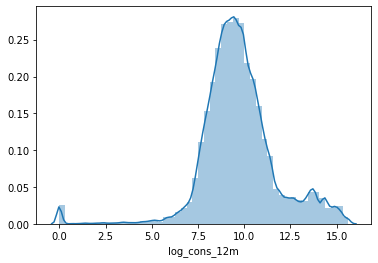

In [25]:
#First for the cons_12, remove the negative values and apply a log tranformation
client.loc[client.cons_12m<0,'cons_12m']=np.nan
client['cons_12m']=client['cons_12m'].dropna()
client['log_cons_12m']=client['cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_cons_12m']);

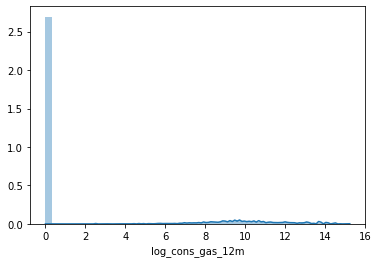

In [26]:
client.loc[client.cons_gas_12m<0,'cons_gas_12m']=np.nan
client['cons_gas_12m']=client['cons_gas_12m'].dropna()
client['log_cons_gas_12m']=client['cons_gas_12m'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_cons_gas_12m']);

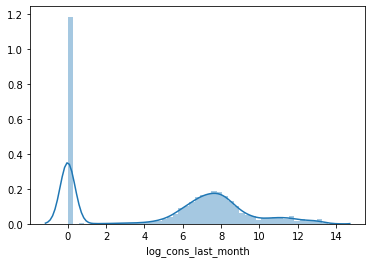

In [27]:
client.loc[client.cons_last_month<0,'cons_last_month']=np.nan
client['cons_last_month']=client['cons_last_month'].dropna()
client['log_cons_last_month']=client['cons_last_month'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_cons_last_month']);

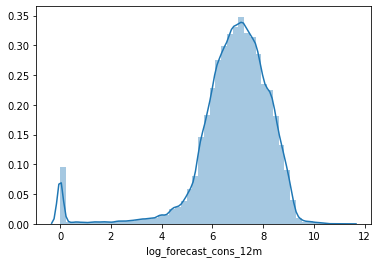

In [28]:
client.loc[client.forecast_cons_12m<0,'forecast_cons_12m']=np.nan
client['forecast_cons_12m']=client['forecast_cons_12m'].dropna()
client['log_forecast_cons_12m']=client['forecast_cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_forecast_cons_12m']);

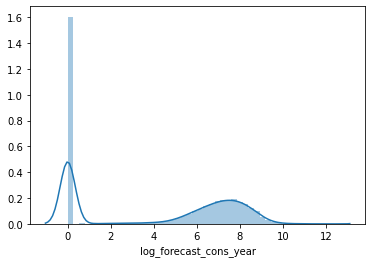

In [29]:
client.loc[client.forecast_cons_year<0,'forecast_cons_year']=np.nan
client['forecast_cons_year']=client['forecast_cons_year'].dropna()
client['log_forecast_cons_year']=client['forecast_cons_year'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_forecast_cons_year']);

<AxesSubplot:xlabel='log_forecast_meter_rent_12m'>

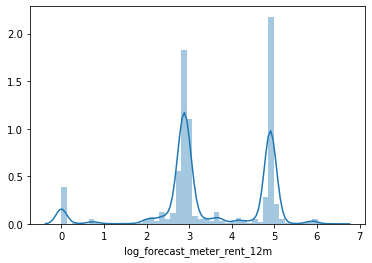

In [30]:
client.loc[client.forecast_meter_rent_12m<0,'forecast_meter_rent_12m']=np.nan
client['forecast_meter_rent_12m']=client['forecast_meter_rent_12m'].dropna()
client['log_forecast_meter_rent_12m']=client['forecast_meter_rent_12m'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_forecast_meter_rent_12m'])


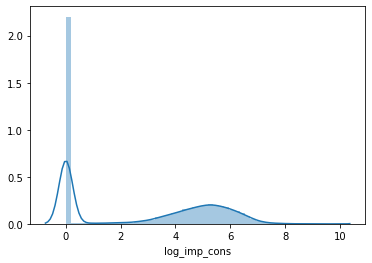

In [31]:
client.loc[client.imp_cons<0,'imp_cons']=np.nan
client['imp_cons']=client['imp_cons'].dropna()
client['log_imp_cons']=client['imp_cons'].apply(lambda x:np.log(1+x))
sns.distplot(client['log_imp_cons']);

## finding co relation 

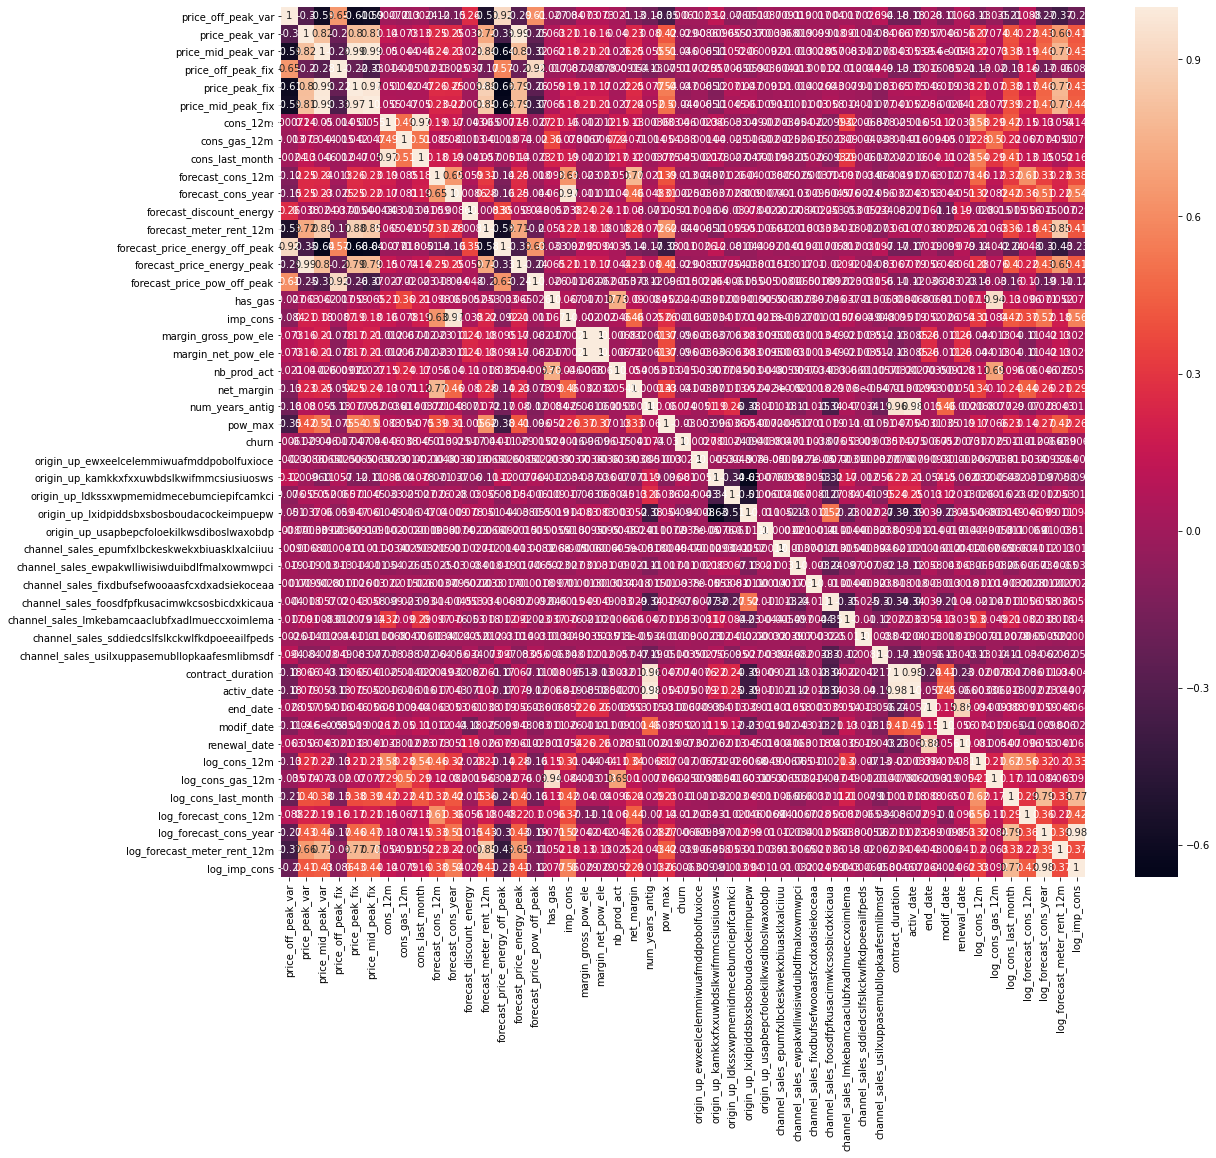

In [32]:
#Calculate correlation of variables
corr=client.corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [33]:
# some colum are highly co related with independent variables, thus, i removed i.e., active_date
client=client.drop(['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','imp_cons'],axis=1)


In [34]:
client.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,...,end_date,modif_date,renewal_date,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons
0,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0,0.14398,0.0,...,-5,8,6,8.18228,0.0,6.447306,6.277583,6.447306,3.024806,4.530662
1,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0,0.14398,0.0,...,-5,8,6,8.18228,0.0,6.447306,6.277583,6.447306,3.024806,4.530662
2,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0,0.14398,0.0,...,-5,8,6,8.18228,0.0,6.447306,6.277583,6.447306,3.024806,4.530662
3,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,0.0,0.14398,0.0,...,-5,8,6,8.18228,0.0,6.447306,6.277583,6.447306,3.024806,4.530662
4,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,0.0,0.14398,0.0,...,-5,8,6,8.18228,0.0,6.447306,6.277583,6.447306,3.024806,4.530662


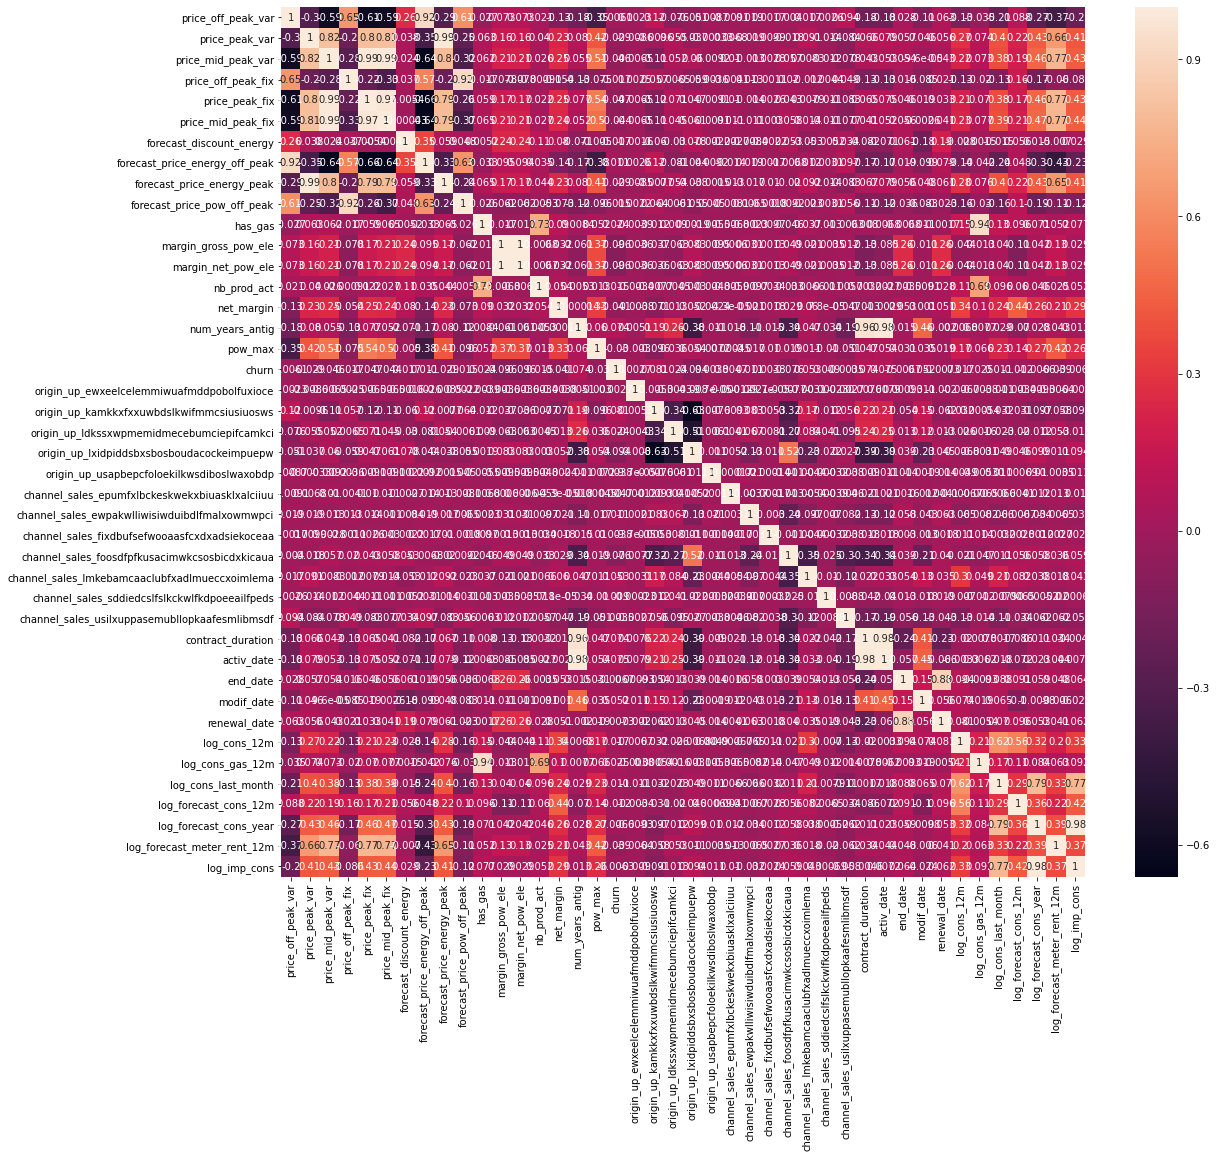

In [35]:
corr=client.corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [36]:
# dropping highly corelated column
client.drop(columns=['num_years_antig'],inplace=True)

In [37]:
client.dtypes

id                                                 object
price_off_peak_var                                float64
price_peak_var                                    float64
price_mid_peak_var                                float64
price_off_peak_fix                                float64
price_peak_fix                                    float64
price_mid_peak_fix                                float64
forecast_discount_energy                          float64
forecast_price_energy_off_peak                    float64
forecast_price_energy_peak                        float64
forecast_price_pow_off_peak                       float64
has_gas                                             int64
margin_gross_pow_ele                              float64
margin_net_pow_ele                                float64
nb_prod_act                                         int64
net_margin                                        float64
pow_max                                           float64
churn         

In [38]:
#I will use IQR method to detect outliers
def remove_outliers(df,col):
    df.loc[df[col]<0,col]=df[col].mean()
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    upper_bound=q3+(iqr*1.5)
    lower_bound=q1-(iqr*1.5)
    df=df[(lower_bound<df[col])|(df[col]<upper_bound)]

In [39]:
remove_outliers(client,'price_off_peak_var')
remove_outliers(client,'price_peak_var')
remove_outliers(client,'price_mid_peak_var')
remove_outliers(client,'price_off_peak_fix')
remove_outliers(client,'price_peak_fix')
remove_outliers(client,'price_mid_peak_fix')
remove_outliers(client,'forecast_discount_energy')
remove_outliers(client,'forecast_price_energy_off_peak')
remove_outliers(client,'forecast_price_energy_peak')
remove_outliers(client,'forecast_price_pow_off_peak')
remove_outliers(client,'log_cons_gas_12m')
remove_outliers(client,'log_cons_last_month')
remove_outliers(client,'log_forecast_cons_12m')
remove_outliers(client,'log_forecast_meter_rent_12m')
remove_outliers(client,'log_forecast_cons_year')
remove_outliers(client,'margin_gross_pow_ele')
remove_outliers(client,'margin_net_pow_ele')
remove_outliers(client,'net_margin')
remove_outliers(client,'pow_max')


## Splitting data

In [40]:
#First we need to specify features and target 
y=client['churn']
X=client.drop(['churn','id'],axis=1)

In [41]:
#Spliting dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)